# <p style="text-align: center;">ESTUDO SOBRE ANÁLISE DE AÇÕES + MACHINE LEARNING</p>

## Bibliotecas usadas

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.graph_objects as go



C:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Identificando a ação

#### Código

In [2]:
acao = input("Insira a ação para o estudo: ")       
ticker_acao = yf.Ticker(acao)

Insira a ação para o estudo:  PETR4.SA


#### Ação analisada:

In [3]:
acao

'PETR4.SA'

## Histórico da ação

#### Código

In [4]:
historico = ticker_acao.history()
historico.index = pd.to_datetime(historico.index)
historico.index = historico.index.strftime('%Y-%m-%d')


C:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [5]:
historico

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02,37.439999,37.889999,37.400002,37.779999,24043800,0.0,0.0
2024-01-03,37.799999,39.119999,37.669998,38.959999,52300200,0.0,0.0
2024-01-04,39.119999,39.349998,38.509998,38.630001,45344900,0.0,0.0
2024-01-05,38.869999,39.139999,38.410000,38.720001,35783700,0.0,0.0
2024-01-08,38.380001,38.430000,37.610001,38.430000,35158100,0.0,0.0
2024-01-09,38.669998,38.750000,38.029999,38.099998,27279000,0.0,0.0
2024-01-10,38.099998,38.270000,37.509998,37.750000,27382000,0.0,0.0
2024-01-11,37.980000,38.150002,37.700001,38.070000,26564400,0.0,0.0
2024-01-12,38.500000,38.730000,38.169998,38.169998,24479500,0.0,0.0


## Análise de 6 meses

#### Código

In [6]:
seis_meses = ticker_acao.history("6mo")
fechamento = seis_meses.Close
seis_meses.index = pd.to_datetime(seis_meses.index)
seis_meses.index = seis_meses.index.strftime('%Y-%m-%d')
fechamento.index = pd.to_datetime(fechamento.index)
fechamento.index = fechamento.index.strftime('%Y-%m-%d')
abertura = seis_meses.Open
abertura.index = pd.to_datetime(abertura.index)
abertura.index = abertura.index.strftime('%Y-%m-%d')

C:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


## <p style="text-align: center;">Visualização de dados</p>

In [7]:
seis_meses

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-31,28.107458,28.895951,28.107458,28.858847,91290800,0.0,0.0
2023-08-01,28.840293,28.840293,27.782785,28.385750,75752400,0.0,0.0
2023-08-02,28.302263,28.367197,27.643638,28.320816,62068400,0.0,0.0
2023-08-03,28.691871,28.877398,28.404303,28.682594,57304400,0.0,0.0
2023-08-04,28.478516,28.886676,27.587982,27.829168,120685800,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-23,37.840000,38.369999,37.430000,38.169998,32498500,0.0,0.0
2024-01-24,38.290001,38.540001,37.770000,37.880001,25415300,0.0,0.0
2024-01-25,38.259998,39.279999,38.130001,39.279999,48655300,0.0,0.0


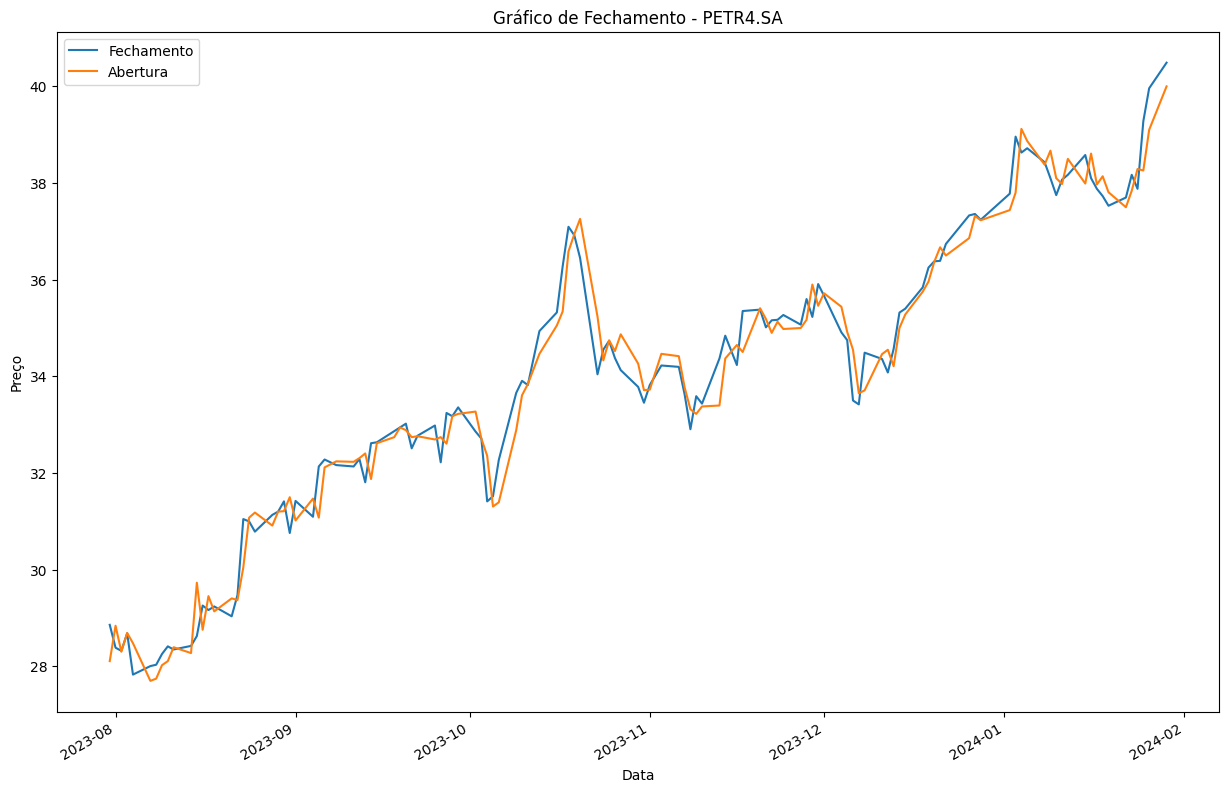

In [8]:
plt.figure(figsize=(15,10))
fechamento.index = pd.to_datetime(fechamento.index)
abertura.index = pd.to_datetime(abertura.index)
fechamento.plot(label='Fechamento')
abertura.plot(label='Abertura')
plt.title(f"Gráfico de Fechamento - {acao}")
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()


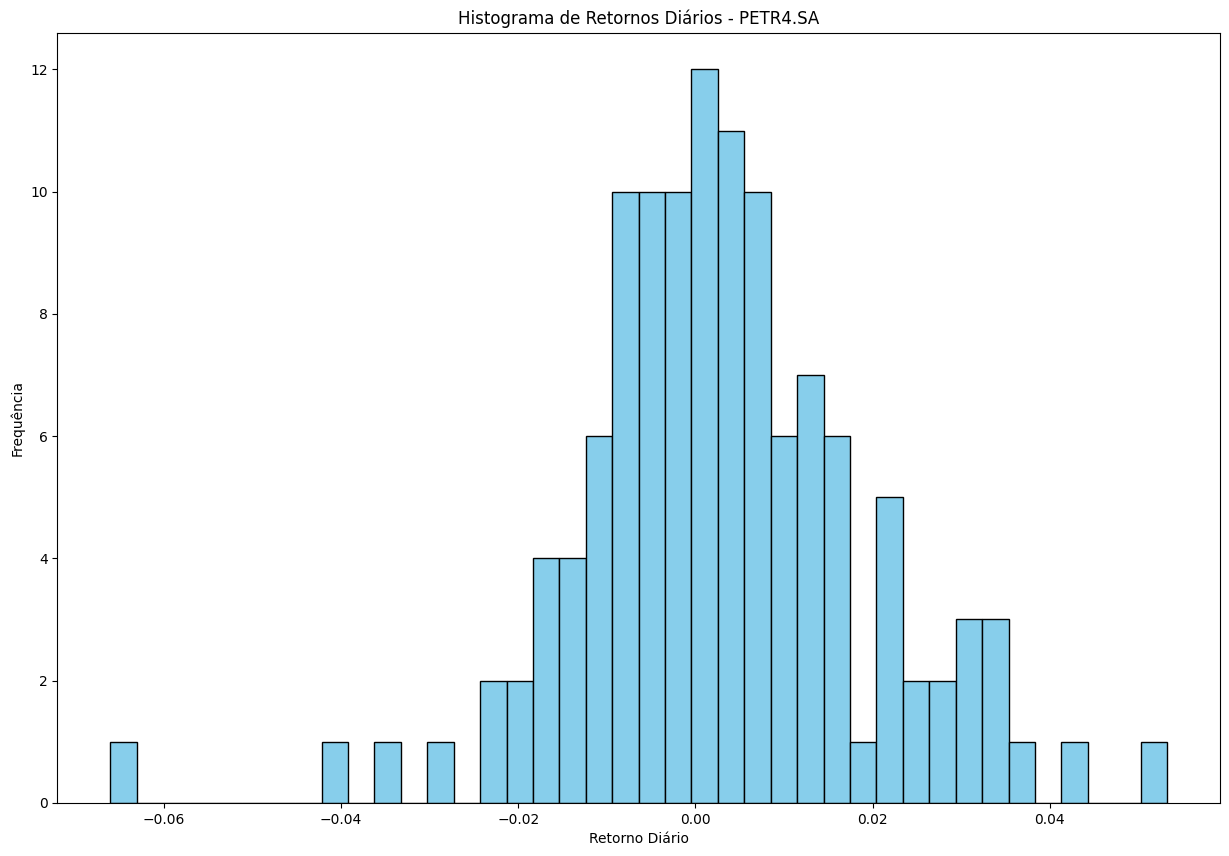

In [9]:
plt.figure(figsize=(15,10))
seis_meses['Daily_Return'] = seis_meses['Close'].pct_change()
plt.hist(seis_meses['Daily_Return'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.title(f'Histograma de Retornos Diários - {acao}')
figura_histograma = plt.gcf()




### Previsões com machine learning

In [10]:
historico2 = ticker_acao.history("3y")

C:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [11]:
treinamento = historico2.reset_index()
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)
treinamento = treinamento[['Date', 'Close']]
treinamento.columns = ['ds', 'y']
modelo = Prophet()
modelo.fit(treinamento)
periodo = modelo.make_future_dataframe(periods=90)
previsoes = modelo.predict(periodo)

18:08:26 - cmdstanpy - INFO - Chain [1] start processing
18:08:28 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
plot_plotly(modelo, previsoes, xlabel = "período", ylabel="valor")
